In [1]:
from sklearn.datasets import load_files
from keras.utils import np_utils
import numpy as np

def load_dataset(path):
    data = load_files(path)
    defect_files = np.array(data['filenames'])
    defect_targets = np_utils.to_categorical(np.array(data['target']), 6)
    return defect_files, defect_targets

Using TensorFlow backend.


In [2]:
all_files, all_targets = load_dataset('NEU-CLS')
print('There are totally %d defect images.' % len(all_files))
print('There are totally 6 defect types.')

There are totally 1800 defect images.
There are totally 6 defect types.


In [3]:
for i in range(0, 20):
    print(all_files[i], ': ', all_targets[i])

NEU-CLS\In\In_97.bmp :  [ 0.  1.  0.  0.  0.  0.]
NEU-CLS\PS\PS_37.bmp :  [ 0.  0.  1.  0.  0.  0.]
NEU-CLS\Pa\Pa_76.bmp :  [ 0.  0.  0.  1.  0.  0.]
NEU-CLS\In\In_25.bmp :  [ 0.  1.  0.  0.  0.  0.]
NEU-CLS\Sc\Sc_3.bmp :  [ 0.  0.  0.  0.  0.  1.]
NEU-CLS\Pa\Pa_41.bmp :  [ 0.  0.  0.  1.  0.  0.]
NEU-CLS\Sc\Sc_289.bmp :  [ 0.  0.  0.  0.  0.  1.]
NEU-CLS\Cr\Cr_263.bmp :  [ 1.  0.  0.  0.  0.  0.]
NEU-CLS\PS\PS_98.bmp :  [ 0.  0.  1.  0.  0.  0.]
NEU-CLS\Sc\Sc_40.bmp :  [ 0.  0.  0.  0.  0.  1.]
NEU-CLS\PS\PS_137.bmp :  [ 0.  0.  1.  0.  0.  0.]
NEU-CLS\RS\RS_278.bmp :  [ 0.  0.  0.  0.  1.  0.]
NEU-CLS\RS\RS_68.bmp :  [ 0.  0.  0.  0.  1.  0.]
NEU-CLS\Pa\Pa_156.bmp :  [ 0.  0.  0.  1.  0.  0.]
NEU-CLS\Sc\Sc_236.bmp :  [ 0.  0.  0.  0.  0.  1.]
NEU-CLS\Cr\Cr_104.bmp :  [ 1.  0.  0.  0.  0.  0.]
NEU-CLS\Cr\Cr_58.bmp :  [ 1.  0.  0.  0.  0.  0.]
NEU-CLS\RS\RS_109.bmp :  [ 0.  0.  0.  0.  1.  0.]
NEU-CLS\In\In_268.bmp :  [ 0.  1.  0.  0.  0.  0.]
NEU-CLS\PS\PS_8.bmp :  [ 0.  0.  1.  0.  0

0 :  300
1 :  300
2 :  300
3 :  300
4 :  300
5 :  300


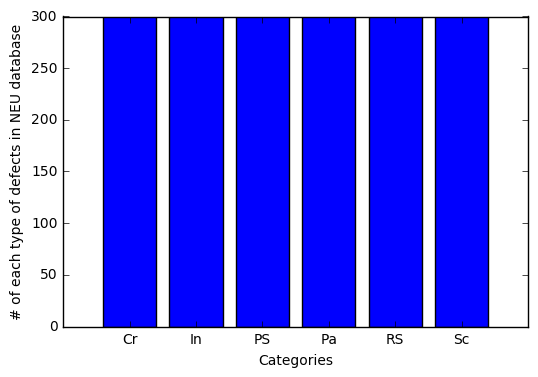

In [4]:
atargets = np.array(all_targets)
atargets_number = [np.where(r==1)[0][0] for r in all_targets]

numbers = []
for i in range(0, 6):
    print(i, ': ', atargets_number.count(i))
    numbers.append(atargets_number.count(i))

%matplotlib inline
import matplotlib.pyplot as plt

x_labels = ['Cr', 'In', 'PS', 'Pa', 'RS', 'Sc']
x_axis = [0, 1, 2, 3, 4, 5]
plt.bar(x_axis , numbers, align='center')
plt.xlabel('Categories')
plt.ylabel('# of each type of defects in NEU database')
plt.xticks(x_axis, x_labels)
plt.show()

pixel intensity: 0 : avg =  106.919725 , std =  10.3733302716
pixel intensity: 1 : avg =  203.372975 , std =  23.736917758
pixel intensity: 2 : avg =  155.645925 , std =  56.0283687599
pixel intensity: 3 : avg =  66.885525 , std =  10.3131164288
pixel intensity: 4 : avg =  98.025175 , std =  15.7265966191
pixel intensity: 5 : avg =  177.93265 , std =  70.8321276962
pixel intensity: 6 : avg =  89.414 , std =  21.2674870166
pixel intensity: 7 : avg =  156.312875 , std =  30.0983169668
pixel intensity: 8 : avg =  230.253275 , std =  18.9825374166
pixel intensity: 9 : avg =  152.562175 , std =  15.9571358417
pixel intensity: 10 : avg =  150.34015 , std =  28.3946024444
pixel intensity: 11 : avg =  86.15715 , std =  12.8678185361
pixel intensity: 12 : avg =  123.3575 , std =  17.0130859561
pixel intensity: 13 : avg =  175.26365 , std =  56.3148225486
pixel intensity: 14 : avg =  84.738 , std =  18.0342245744
pixel intensity: 15 : avg =  94.406475 , std =  32.9084936312
pixel intensity: 16 :

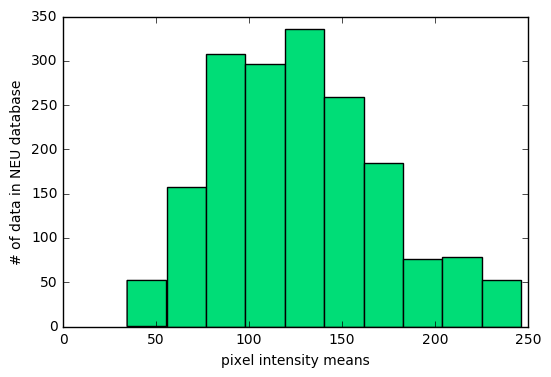

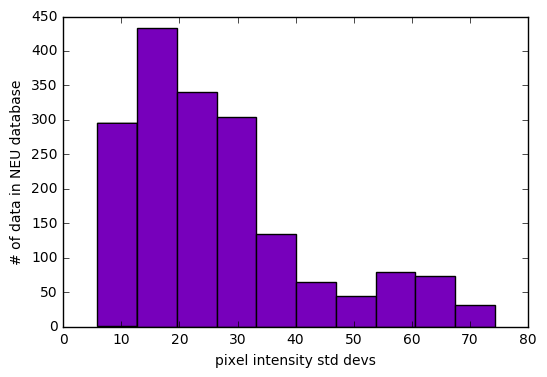

average pixel intensity means for all:  128.298783278
standard deviation of pixel intensity means for all:  44.5036539505
average pixel intensity std devs for all:  26.7068243114


In [5]:
import cv2

avgPIArr = []
stdPIArr = []
for i in range(0, len(all_files)):
    img = cv2.imread(all_files[i], cv2.IMREAD_GRAYSCALE)
    
    oneAvgPI = np.mean(img)
    oneStdPI = np.std(img)
    
    if i < 20:
        print('pixel intensity:', i, ': avg = ', oneAvgPI, ', std = ', oneStdPI)
    
    avgPIArr.append(oneAvgPI)
    stdPIArr.append(oneStdPI)

plt.hist(avgPIArr, color = '#00DD77')
plt.xlabel('pixel intensity means')
plt.ylabel('# of data in NEU database')
plt.show()

plt.hist(stdPIArr, color = '#7700BB')
plt.xlabel('pixel intensity std devs')
plt.ylabel('# of data in NEU database')
plt.show()

avgPI = np.mean(avgPIArr)
stdAvgPI = np.std(avgPIArr)
stdPI = np.mean(stdPIArr)
print('average pixel intensity means for all: ', avgPI)
print('standard deviation of pixel intensity means for all: ', stdAvgPI)
print('average pixel intensity std devs for all: ', stdPI)

In [6]:
from sklearn.cross_validation import train_test_split

all_images = []
for file in all_files:
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    all_images.append(img)

X_train, X_test, y_train, y_test = train_test_split(all_images, all_targets, test_size=0.2, random_state=42)
print('There are %d training defect images.' % len(X_train))
print('There are %d testing defect images.' % len(X_test))

There are 1440 training defect images.
There are 360 testing defect images.


0 :  241
1 :  238
2 :  244
3 :  237
4 :  244
5 :  236


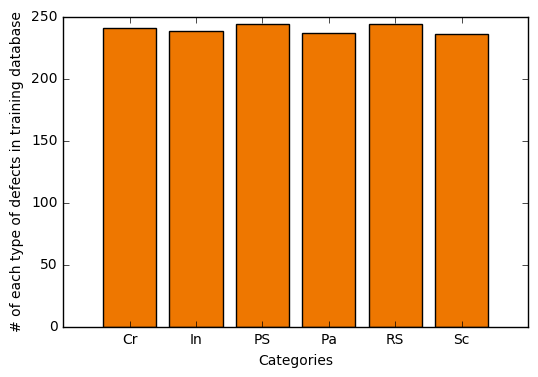

0 :  59
1 :  62
2 :  56
3 :  63
4 :  56
5 :  64


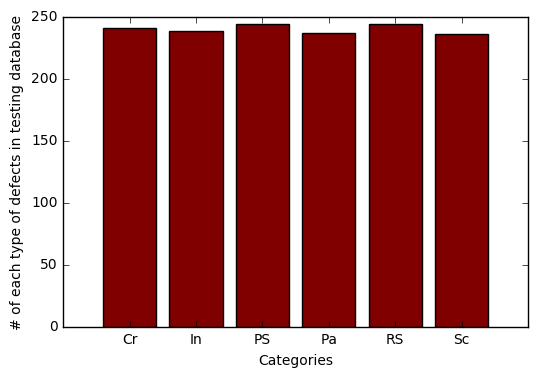

In [7]:
ay_train = np.array(y_train)
y_train_number = [np.where(r==1)[0][0] for r in ay_train]

numbers = []
for i in range(0, 6):
    print(i, ': ', y_train_number.count(i))
    numbers.append(y_train_number.count(i))

plt.bar(x_axis, numbers, align='center', color ='#EE7700')
plt.xlabel('Categories')
plt.ylabel('# of each type of defects in training database')
plt.xticks(x_axis, x_labels)
plt.show()

ay_test = np.array(y_test)
y_test_number = [np.where(r==1)[0][0] for r in ay_test]

numbers = []
for i in range(0, 6):
    print(i, ': ', y_test_number.count(i))
    numbers.append(y_train_number.count(i))

plt.bar(x_axis, numbers, align='center', color = 'maroon')
plt.xlabel('Categories')
plt.ylabel('# of each type of defects in testing database')
plt.xticks(x_axis, x_labels)
plt.show()

In [8]:
val_train_x = []
val_train_y = []
val_test_x = []
val_test_y = []

def validate_data(k):
    for j in range(0, len(y_train)):
        if (j % k) == 0:
            val_test_x.append(X_train[j])
            val_test_y.append(y_train[j])
        else:
            val_train_x.append(X_train[j])
            val_train_y.append(y_train[j])

validate_data(5)

print('There are %d validation training defect images.' % len(val_train_x))
print('There are %d validation testing defect images.' % len(val_test_x))

There are 1152 validation training defect images.
There are 288 validation testing defect images.


0 :  188
1 :  190
2 :  196
3 :  188
4 :  199
5 :  191


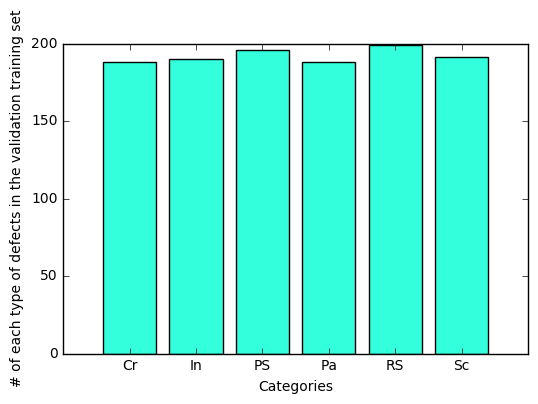

0 :  53
1 :  48
2 :  48
3 :  49
4 :  45
5 :  45


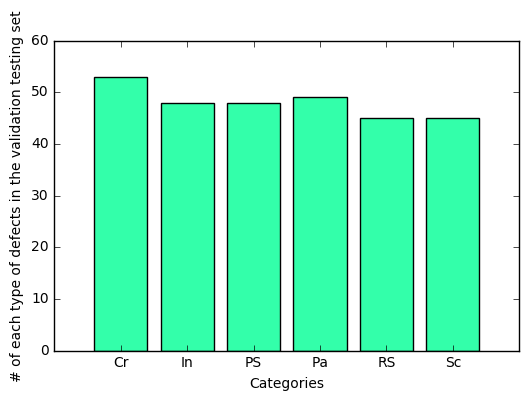

In [9]:
colors = ['#33FFDD', '#33FFAA']

aval_train_y = np.array(val_train_y)
val_train_y_number = [np.where(r==1)[0][0] for r in aval_train_y]

numbers = []
for i in range(0, 6):
    print(i, ': ', val_train_y_number.count(i))
    numbers.append(val_train_y_number.count(i))

plt.bar(x_axis, numbers, align='center', color = colors[0])
plt.xlabel('Categories')
plt.ylabel('# of each type of defects in the validation training set')
plt.xticks(x_axis, x_labels)
plt.show()

aval_test_y = np.array(val_test_y)
val_test_y_number = [np.where(r==1)[0][0] for r in aval_test_y]

numbers = []
for i in range(0, 6):
    print(i, ': ', val_test_y_number.count(i))
    numbers.append(val_test_y_number.count(i))

plt.bar(x_axis, numbers, align='center', color = colors[1])
plt.xlabel('Categories')
plt.ylabel('# of each type of defects in the validation testing set')
plt.xticks(x_axis, x_labels)
plt.show()

In [10]:
from skimage.transform import resize

inception_val_train_x = []
inception_val_test_x = []

def inception_validation_data():
    for j in range(0, len(val_train_x)):
        image_resized = resize(val_train_x[j], (224, 224, 3))
        inception_val_train_x.append(image_resized)

    for j in range(0, len(val_test_x)):
        image_resized = resize(val_test_x[j], (224, 224, 3))
        inception_val_test_x.append(image_resized)

inception_validation_data()

In [11]:
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Input

input_tensor = Input(shape=(224, 224, 3))
base_model = InceptionV3(input_tensor = input_tensor, weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, 111, 111, 32)  864         input_1[0][0]                    
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 111, 111, 32)  96          conv2d_1[0][0]                   
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 111, 111, 32)  0           batch_normalization_1[0][0]      
___________________________________________________________________________________________

In [396]:
from keras.callbacks import ModelCheckpoint  

checkpointer = ModelCheckpoint(filepath='saved_model/weights.best.inception.hdf5', 
                               verbose=1, save_best_only=True)

print(np.shape(inception_val_train_x))
print(np.shape(val_train_y))
print(np.shape(inception_val_test_x))
print(np.shape(val_test_y))
model.fit(np.array(inception_val_train_x), np.array(val_train_y), 
          validation_data=(np.array(inception_val_test_x), np.array(val_test_y)),
          epochs=10, batch_size=50, callbacks=[checkpointer], verbose=1)

(1152, 224, 224, 3)
(1152, 6)
(288, 224, 224, 3)
(288, 6)
Train on 1152 samples, validate on 288 samples
Epoch 1/10
1152/1152 [==============================] - 842s - loss: 4.3827 - acc: 0.4392 - val_loss: 5.3934 - val_acc: 0.2569
Epoch 2/10
1152/1152 [==============================] - 789s - loss: 0.9067 - acc: 0.7465 - val_loss: 1.5713 - val_acc: 0.4097
Epoch 3/10
1152/1152 [==============================] - 784s - loss: 0.6680 - acc: 0.8229 - val_loss: 9.6272 - val_acc: 0.1563
Epoch 4/10
1152/1152 [==============================] - 787s - loss: 0.6119 - acc: 0.9019 - val_loss: 7.0901 - val_acc: 0.2882
Epoch 5/10
1152/1152 [==============================] - 775s - loss: 0.7503 - acc: 0.8455 - val_loss: 7.1953 - val_acc: 0.2951
Epoch 6/10
1152/1152 [==============================] - 774s - loss: 0.4784 - acc: 0.9071 - val_loss: 6.2894 - val_acc: 0.2118
Epoch 7/10
1152/1152 [==============================] - 764s - loss: 0.6794 - acc: 0.8672 - val_loss: 7.5736 - val_acc: 0.1701
Epoch 

In [400]:
inception_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

inception_datagen.fit(np.array(inception_val_train_x))

model.fit_generator(inception_datagen.flow(np.array(inception_val_train_x), np.array(val_train_y), batch_size=32),
                    validation_data=(np.array(inception_val_test_x), np.array(val_test_y)),
                    steps_per_epoch=np.array(inception_val_train_x).shape[0]/32, epochs=10, callbacks=[checkpointer], verbose=1)

Epoch 1/10
36/36 [==============================] - 798s - loss: 3.4151 - acc: 0.4514 - val_loss: 2.5140 - val_acc: 0.3194
Epoch 2/10
36/36 [==============================] - 769s - loss: 0.8822 - acc: 0.7127 - val_loss: 2.5341 - val_acc: 0.3160
Epoch 3/10
36/36 [==============================] - 832s - loss: 0.7189 - acc: 0.7769 - val_loss: 1.3511 - val_acc: 0.5069
Epoch 4/10
36/36 [==============================] - 766s - loss: 0.5406 - acc: 0.8168 - val_loss: 1.7117 - val_acc: 0.4444
Epoch 5/10
36/36 [==============================] - 769s - loss: 0.6362 - acc: 0.8151 - val_loss: 2.1351 - val_acc: 0.4549
Epoch 6/10
36/36 [==============================] - 767s - loss: 0.3292 - acc: 0.8880 - val_loss: 1.2417 - val_acc: 0.5660
Epoch 7/10
36/36 [==============================] - 769s - loss: 0.4409 - acc: 0.8655 - val_loss: 0.8202 - val_acc: 0.7014
Epoch 8/10
36/36 [==============================] - 770s - loss: 0.3580 - acc: 0.8811 - val_loss: 1.9464 - val_acc: 0.5069
Epoch 9/10
36/36

In [401]:
model.load_weights('saved_model/weights.best.inception.hdf5')

inception_test_x = []
for i in range(0, len(X_test)):
    image_resized = resize(X_test[i], (224, 224, 3))
    inception_test_x.append(image_resized)

inception_predictions = [np.argmax(model.predict(np.expand_dims(feature, axis=0))) for feature in inception_test_x]

test_accuracy = 100*np.sum(np.array(inception_predictions)==np.argmax(y_test, axis=1))/len(inception_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 76.1111%


In [12]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation
from keras.layers import Dropout, Flatten, Dense
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential

cnn_model_all = Sequential()

cnn_model_all.add(Conv2D(filters = 128, kernel_size = (3,3), input_shape = (200, 200, 3)))
cnn_model_all.add(Activation("relu"))
cnn_model_all.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

cnn_model_all.add(Conv2D(filters = 64, kernel_size = (3,3)))
cnn_model_all.add(Activation("relu"))
cnn_model_all.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

cnn_model_all.add(Conv2D(filters = 32, kernel_size = (3,3)))
cnn_model_all.add(Activation("relu"))
cnn_model_all.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

cnn_model_all.add(Conv2D(filters = 16, kernel_size = (3,3)))
cnn_model_all.add(Activation("relu"))
cnn_model_all.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

cnn_model_all.add(GlobalAveragePooling2D())
cnn_model_all.add(Dense(1024, activation='relu'))
cnn_model_all.add(Dropout(0.2))

cnn_model_all.add(Dense(6))
cnn_model_all.add(Activation("softmax"))
cnn_model_all.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_95 (Conv2D)           (None, 198, 198, 128)     3584      
_________________________________________________________________
activation_95 (Activation)   (None, 198, 198, 128)     0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 99, 99, 128)       0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 97, 97, 64)        73792     
_________________________________________________________________
activation_96 (Activation)   (None, 97, 97, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 47, 47, 32)        18464     
__________

In [393]:
cnn_model_all.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_model/weights.best.own_cnn.hdf5', 
                               verbose=1, save_best_only=True)

cnn_model_all.fit(np.array(val_train_x), np.array(val_train_y), 
          validation_data=(np.array(val_test_x), np.array(val_test_y)),
          epochs=10, batch_size=32, callbacks=[checkpointer], verbose=1)

Train on 1152 samples, validate on 288 samples
Epoch 1/10
1152/1152 [==============================] - 527s - loss: 2.4685 - acc: 0.1988 - val_loss: 2.2316 - val_acc: 0.1840
Epoch 2/10
1152/1152 [==============================] - 544s - loss: 1.6982 - acc: 0.3099 - val_loss: 1.3819 - val_acc: 0.3958
Epoch 3/10
1152/1152 [==============================] - 514s - loss: 1.9793 - acc: 0.3733 - val_loss: 1.4171 - val_acc: 0.4028
Epoch 4/10
1152/1152 [==============================] - 510s - loss: 1.8392 - acc: 0.3802 - val_loss: 1.4091 - val_acc: 0.3958
Epoch 5/10
1152/1152 [==============================] - 513s - loss: 1.5604 - acc: 0.3767 - val_loss: 1.3640 - val_acc: 0.3715
Epoch 6/10
1152/1152 [==============================] - 512s - loss: 5.8062 - acc: 0.2995 - val_loss: 12.3984 - val_acc: 0.2153
Epoch 7/10
1152/1152 [==============================] - 514s - loss: 2.3856 - acc: 0.3689 - val_loss: 1.3619 - val_acc: 0.3958
Epoch 8/10
1152/1152 [==============================] - 517s - 

In [394]:
cnn_model_all.save_weights("saved_model/weights.best.own_cnn.hdf5")

predictions = [np.argmax(cnn_model_all.predict(np.expand_dims(feature, axis=0))) for feature in X_test]

test_accuracy = 100*np.sum(np.array(predictions)==np.argmax(y_test, axis=1))/len(predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 17.7778%


In [13]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), input_shape = (40, 40, 3)))
cnn_model.add(Activation("relu"))
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3)))
cnn_model.add(Activation("relu"))
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3)))
cnn_model.add(Activation("relu"))
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

cnn_model.add(Conv2D(filters = 16, kernel_size = (3,3)))
cnn_model.add(Activation("relu"))
cnn_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

cnn_model.add(GlobalAveragePooling2D())
cnn_model.add(Dense(1024, activation='relu'))
cnn_model.add(Dropout(0.2))

cnn_model.add(Dense(6))
cnn_model.add(Activation("softmax"))
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_99 (Conv2D)           (None, 38, 38, 128)       3584      
_________________________________________________________________
activation_100 (Activation)  (None, 38, 38, 128)       0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 19, 19, 128)       0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 17, 17, 64)        73792     
_________________________________________________________________
activation_101 (Activation)  (None, 17, 17, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 7, 7, 32)          18464     
__________

In [371]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='saved_model/weights.best.own_cnn_resize.hdf5', 
                               verbose=1, save_best_only=True)

In [14]:
cnn_val_train_x = []
cnn_val_test_x = []

def cnn_validation_data(size):
    for j in range(0, len(val_train_x)):
        image_resized = resize(val_train_x[j], (size, size, 3))
        cnn_val_train_x.append(image_resized)

    for j in range(0, len(val_test_x)):
        image_resized = resize(val_test_x[j], (size, size, 3))
        cnn_val_test_x.append(image_resized)

cnn_validation_data(40)

In [373]:
cnn_model.fit(np.array(cnn_val_train_x), np.array(val_train_y), 
          validation_data=(np.array(cnn_val_test_x), np.array(val_test_y)),
          epochs=10, batch_size=32, callbacks=[checkpointer], verbose=1)

Train on 1152 samples, validate on 288 samples
Epoch 1/10
1152/1152 [==============================] - 22s - loss: 1.7761 - acc: 0.1866 - val_loss: 1.7682 - val_acc: 0.1701
Epoch 2/10
1152/1152 [==============================] - 17s - loss: 1.7139 - acc: 0.2812 - val_loss: 1.5936 - val_acc: 0.2604
Epoch 3/10
1152/1152 [==============================] - 18s - loss: 1.5683 - acc: 0.3446 - val_loss: 1.3820 - val_acc: 0.3819
Epoch 4/10
1152/1152 [==============================] - 18s - loss: 1.5187 - acc: 0.3750 - val_loss: 1.8384 - val_acc: 0.2639
Epoch 5/10
1152/1152 [==============================] - 16s - loss: 1.5086 - acc: 0.4036 - val_loss: 1.4484 - val_acc: 0.4167
Epoch 6/10
1152/1152 [==============================] - 17s - loss: 1.5260 - acc: 0.4019 - val_loss: 1.4439 - val_acc: 0.4375
Epoch 7/10
1152/1152 [==============================] - 18s - loss: 1.3268 - acc: 0.4609 - val_loss: 1.3985 - val_acc: 0.4271
Epoch 8/10
1152/1152 [==============================] - 16s - loss: 1.4

In [50]:
cnn_test_x = []
for i in range(0, len(X_test)):
    image_resized = resize(X_test[i], (40, 40, 3))
    cnn_test_x.append(image_resized)

In [375]:
cnn_model.save_weights("saved_model/weights.best.own_cnn_resize.hdf5")

predictions = [np.argmax(cnn_model.predict(np.expand_dims(feature, axis=0))) for feature in cnn_test_x]

test_accuracy = 100*np.sum(np.array(predictions)==np.argmax(y_test, axis=1))/len(predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 40.0000%


In [16]:
test_model = Sequential()

test_model.add(Conv2D(filters = 128, kernel_size = (3,3), input_shape = (40, 40, 3)))
test_model.add(Activation("relu"))
test_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

test_model.add(Conv2D(filters = 64, kernel_size = (3,3)))
test_model.add(Activation("relu"))
test_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

test_model.add(Conv2D(filters = 32, kernel_size = (3,3)))
test_model.add(Activation("relu"))
test_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

test_model.add(GlobalAveragePooling2D())
test_model.add(Dense(1024, activation='relu'))
test_model.add(Dropout(0.2))

test_model.add(Dense(6))
test_model.add(Activation("softmax"))


In [17]:
from keras.callbacks import ModelCheckpoint

test_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='saved_model/weights.best.own_cnn_test.hdf5', 
                               verbose=1, save_best_only=True)

In [377]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

datagen.fit(np.array(cnn_val_train_x))

test_model.fit_generator(datagen.flow(np.array(cnn_val_train_x), np.array(val_train_y), batch_size=32),
                    validation_data=(np.array(cnn_val_test_x), np.array(val_test_y)),
                    steps_per_epoch=np.array(cnn_val_train_x).shape[0]/32, epochs=10, callbacks=[checkpointer], verbose=1)

Epoch 1/10
36/36 [==============================] - 24s - loss: 1.7677 - acc: 0.1988 - val_loss: 3.3172 - val_acc: 0.1701
Epoch 2/10
36/36 [==============================] - 17s - loss: 1.7331 - acc: 0.2951 - val_loss: 2.0301 - val_acc: 0.1701
Epoch 3/10
36/36 [==============================] - 17s - loss: 1.6761 - acc: 0.3160 - val_loss: 1.5680 - val_acc: 0.3368
Epoch 4/10
36/36 [==============================] - 18s - loss: 1.4725 - acc: 0.4175 - val_loss: 1.4105 - val_acc: 0.3924
Epoch 5/10
36/36 [==============================] - 17s - loss: 1.3493 - acc: 0.4740 - val_loss: 1.2335 - val_acc: 0.6458
Epoch 6/10
36/36 [==============================] - 17s - loss: 1.2457 - acc: 0.4957 - val_loss: 1.2133 - val_acc: 0.4861
Epoch 7/10
36/36 [==============================] - 17s - loss: 1.2537 - acc: 0.4991 - val_loss: 1.4316 - val_acc: 0.4167
Epoch 8/10
36/36 [==============================] - 18s - loss: 1.1983 - acc: 0.5312 - val_loss: 1.0365 - val_acc: 0.5556
Epoch 9/10
36/36 [======

In [378]:
test_model.save_weights("saved_model/weights.best.own_cnn_test.hdf5")

predictions = [np.argmax(test_model.predict(np.expand_dims(feature, axis=0))) for feature in cnn_test_x]

test_accuracy = 100*np.sum(np.array(predictions)==np.argmax(y_test, axis=1))/len(predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 69.1667%


In [18]:
all_gray_images = []
for file in all_files:
    img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    all_gray_images.append(img)

X_gray_train, X_gray_test, y_gray_train, y_gray_test = train_test_split(all_gray_images, all_targets, test_size=0.2, random_state=42)
print('There are %d training defect images.' % len(X_gray_train))
print('There are %d testing defect images.' % len(X_gray_test))

There are 1440 training defect images.
There are 360 testing defect images.


In [319]:
'''
for i in range(0, len(X_gray_train)):
    oneAvgPI =np.mean(X_gray_train[i])
    coff = float(avgPI) / float(oneAvgPI)
    X_gray_train[i] = X_gray_train[i] * coff    

for i in range(0, len(X_gray_test)):
    oneAvgPI =np.mean(X_gray_test[i])
    coff = float(avgPI) / float(oneAvgPI)
    X_gray_test[i] = X_gray_test[i] * coff 
'''

In [19]:
cnn_val_train_gray_x = []
cnn_val_train_gray_y = []
cnn_val_test_gray_x = []
cnn_val_test_gray_y = []

def cnn_validation_data(k, size):
    for i in range(0, len(X_gray_train)):
        img = resize(X_gray_train[i], (size, size))
        img = np.reshape(img, (size, size, 1))
        if (i % k) == 0:
            cnn_val_test_gray_x.append(img)
            cnn_val_test_gray_y.append(y_gray_train[i])
        else:
            cnn_val_train_gray_x.append(img)
            cnn_val_train_gray_y.append(y_gray_train[i])

cnn_validation_data(5, 40)

In [20]:
test_gray_model = Sequential()

test_gray_model.add(Conv2D(filters = 128, kernel_size = (3,3), input_shape = (40, 40, 1)))
test_gray_model.add(Activation("relu"))
test_gray_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

test_gray_model.add(Conv2D(filters = 64, kernel_size = (3,3)))
test_gray_model.add(Activation("relu"))
test_gray_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

test_gray_model.add(Conv2D(filters = 32, kernel_size = (3,3)))
test_gray_model.add(Activation("relu"))
test_gray_model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

test_gray_model.add(GlobalAveragePooling2D())
test_gray_model.add(Dense(1024, activation='relu'))
test_gray_model.add(Dropout(0.2))

test_gray_model.add(Dense(6))
test_gray_model.add(Activation("softmax"))
    
test_gray_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='saved_model/weights.best.own_cnn_gray.hdf5', 
                               verbose=1, save_best_only=True)

In [349]:
test_gray_model.fit(np.array(cnn_val_train_gray_x), np.array(cnn_val_train_gray_y), 
          validation_data=(np.array(cnn_val_test_gray_x), np.array(cnn_val_test_gray_y)),
          epochs=10, batch_size=32, callbacks=[checkpointer], verbose=1)

Train on 1152 samples, validate on 288 samples
Epoch 1/10
1152/1152 [==============================] - 20s - loss: 1.7623 - acc: 0.2075 - val_loss: 1.7410 - val_acc: 0.1771
Epoch 2/10
1152/1152 [==============================] - 15s - loss: 1.6507 - acc: 0.3281 - val_loss: 1.4266 - val_acc: 0.4688
Epoch 3/10
1152/1152 [==============================] - 19s - loss: 1.4399 - acc: 0.4418 - val_loss: 1.2788 - val_acc: 0.5174
Epoch 4/10
1152/1152 [==============================] - 19s - loss: 1.3535 - acc: 0.4661 - val_loss: 1.2580 - val_acc: 0.4826
Epoch 5/10
1152/1152 [==============================] - 21s - loss: 1.2372 - acc: 0.5382 - val_loss: 1.4601 - val_acc: 0.4271
Epoch 6/10
1152/1152 [==============================] - 28s - loss: 1.1308 - acc: 0.5512 - val_loss: 1.3414 - val_acc: 0.3681
Epoch 7/10
1152/1152 [==============================] - 19s - loss: 1.1060 - acc: 0.5712 - val_loss: 0.9826 - val_acc: 0.5694
Epoch 8/10
1152/1152 [==============================] - 19s - loss: 1.0

In [24]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

datagen.fit(np.array(cnn_val_train_gray_x))

test_gray_model.fit_generator(datagen.flow(np.array(cnn_val_train_gray_x), np.array(cnn_val_train_gray_y), batch_size=32),
                    validation_data=(np.array(cnn_val_test_gray_x), np.array(cnn_val_test_gray_y)),
                    steps_per_epoch=np.array(cnn_val_train_gray_x).shape[0]/32, epochs=25, callbacks=[checkpointer], verbose=1)

Epoch 1/25
36/36 [==============================] - 17s - loss: 1.7581 - acc: 0.2057 - val_loss: 1.7119 - val_acc: 0.2118
Epoch 2/25
36/36 [==============================] - 14s - loss: 1.5831 - acc: 0.3490 - val_loss: 1.5210 - val_acc: 0.3854
Epoch 3/25
36/36 [==============================] - 15s - loss: 1.4277 - acc: 0.4627 - val_loss: 1.2906 - val_acc: 0.4931
Epoch 4/25
36/36 [==============================] - 16s - loss: 1.3044 - acc: 0.4905 - val_loss: 1.1995 - val_acc: 0.5764
Epoch 5/25
36/36 [==============================] - 17s - loss: 1.1727 - acc: 0.5434 - val_loss: 1.3464 - val_acc: 0.4722
Epoch 6/25
36/36 [==============================] - 20s - loss: 1.1396 - acc: 0.5686 - val_loss: 0.9006 - val_acc: 0.6875
Epoch 7/25
36/36 [==============================] - 19s - loss: 1.0585 - acc: 0.5990 - val_loss: 0.8569 - val_acc: 0.7049
Epoch 8/25
36/36 [==============================] - 23s - loss: 1.0109 - acc: 0.6155 - val_loss: 0.7593 - val_acc: 0.7639
Epoch 9/25
36/36 [======

In [21]:
for i in range(0, len(X_gray_test)):
    X_gray_test[i] = resize(X_gray_test[i], (40, 40))
    X_gray_test[i] = np.reshape(X_gray_test[i], (40, 40, 1))

In [25]:
test_gray_model.save_weights("saved_model/weights.best.own_cnn_gray.hdf5")

predictions = [np.argmax(test_gray_model.predict(np.expand_dims(feature, axis=0))) for feature in X_gray_test]

test_accuracy = 100*np.sum(np.array(predictions)==np.argmax(y_gray_test, axis=1))/len(predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 84.1667%


In [31]:
pred_array = np.full((6, 6), 0)
for i in range(0, len(predictions)):
    #print('i = ', i, ', predictions = ', predictions[i], ', label = ', np.argmax(y_gray_test[i]))
    pred_array[np.argmax(y_gray_test[i])][predictions[i]] = pred_array[np.argmax(y_gray_test[i])][predictions[i]] + 1
print(pred_array)

[[43  0  0  0 16  0]
 [ 0 54  7  0  1  0]
 [ 1 14 39  0  2  0]
 [ 1  0  0 62  0  0]
 [ 0  4  1  0 51  0]
 [ 0  6  2  0  2 54]]


In [30]:
for i in range(0, 6):
    for j in range(0, 6):
        for k in range(0, len(X_gray_test)):
            if np.argmax(y_test[k]) == i and predictions[k] == j:
                print('label = ', str(i), ', prediction = ', str(j))
                cv2.imshow('image', X_gray_test[k])
                cv2.waitKey(0)
                cv2.imwrite(str(i) + str(j) + '_1.png', X_gray_test[k])
                cv2.destroyAllWindows()
                break

label =  0 , prediction =  0
label =  0 , prediction =  4
label =  1 , prediction =  1
label =  1 , prediction =  2
label =  1 , prediction =  4
label =  2 , prediction =  0
label =  2 , prediction =  1
label =  2 , prediction =  2
label =  2 , prediction =  4
label =  3 , prediction =  0
label =  3 , prediction =  3
label =  4 , prediction =  1
label =  4 , prediction =  2
label =  4 , prediction =  4
label =  5 , prediction =  1
label =  5 , prediction =  2
label =  5 , prediction =  4
label =  5 , prediction =  5
